In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin


In [53]:
df_anime=pd.read_csv("../datasets/anime-dataset-2023.csv")

In [54]:
df_anime.head(10)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",...,Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...
6,16,Hachimitsu to Clover,Honey and Clover,ハチミツとクローバー,8.0,"Comedy, Drama, Romance","Yuuta Takemoto, a sophomore at an arts college...",TV,24.0,"Apr 15, 2005 to Sep 27, 2005",...,J.C.Staff,Manga,23 min per ep,PG-13 - Teens 13 or older,589.0,862,4136,81747.0,260166,https://cdn.myanimelist.net/images/anime/1301/...
7,17,Hungry Heart: Wild Striker,UNKNOWN,ハングリーハート Wild Striker,7.55,"Comedy, Slice of Life, Sports",As the younger brother of Japanese soccer star...,TV,52.0,"Sep 11, 2002 to Sep 10, 2003",...,Nippon Animation,Manga,23 min per ep,PG-13 - Teens 13 or older,1551.0,4212,237,12960.0,24172,https://cdn.myanimelist.net/images/anime/12/49...
8,18,Initial D Fourth Stage,UNKNOWN,頭文字〈イニシャル〉D FOURTH STAGE,8.16,"Action, Drama",Takumi Fujiwara finally joins Ryousuke and Kei...,TV,24.0,"Apr 17, 2004 to Feb 18, 2006",...,A.C.G.T.,Manga,27 min per ep,PG-13 - Teens 13 or older,393.0,1273,1237,97878.0,173710,https://cdn.myanimelist.net/images/anime/9/105...
9,19,Monster,Monster,モンスター,8.87,"Drama, Mystery, Suspense","Dr. Kenzou Tenma, an elite neurosurgeon recent...",TV,74.0,"Apr 7, 2004 to Sep 28, 2005",...,Madhouse,Manga,24 min per ep,R+ - Mild Nudity,26.0,142,47235,368569.0,1013100,https://cdn.myanimelist.net/images/anime/10/18...


In [55]:
df_anime.isna().sum()

anime_id        0
Name            0
English name    0
Other name      0
Score           0
Genres          0
Synopsis        0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Producers       0
Licensors       0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
Image URL       0
dtype: int64

In [56]:
df_anime.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL'],
      dtype='object')

In [57]:
df_anime["Studios"].value_counts()

Studios
UNKNOWN                            10526
Toei Animation                       834
Sunrise                              532
J.C.Staff                            385
Shanghai Animation Film Studio       335
                                   ...  
Ordet, Encourage Films                 1
Hoods Entertainment, Felix Film        1
Kaeruotoko Shokai                      1
MooGoo, Studio Ranmaru                 1
Youku                                  1
Name: count, Length: 1547, dtype: int64

In [58]:
df_anime["Aired"].value_counts()

Aired
Not available                   915
2012 to ?                        76
2005                             74
2011 to ?                        74
2010 to ?                        72
                               ... 
Mar 3, 1989                       1
May 21, 2006                      1
Oct 2, 1987 to Sep 20, 1988       1
Dec 22, 2011 to Dec 28, 2012      1
Apr 23, 2022                      1
Name: count, Length: 15213, dtype: int64

In [59]:
df_anime["Premiered"].value_counts()

Premiered
UNKNOWN        19399
spring 2017       88
fall 2016         83
spring 2018       81
spring 2016       78
               ...  
summer 1993        1
summer 1974        1
summer 1991        1
spring 1961        1
summer 2025        1
Name: count, Length: 244, dtype: int64

In [60]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [61]:
# Display the count of NaN values for each column
print(df_anime.isna().sum())

anime_id        0
Name            0
English name    0
Other name      0
Score           0
Genres          0
Synopsis        0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Producers       0
Licensors       0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
Image URL       0
dtype: int64


In [62]:
df_anime.shape

(24905, 24)

In [63]:
df_anime["Score"].values

array(['8.75', '8.38', '8.22', ..., 'UNKNOWN', 'UNKNOWN', 'UNKNOWN'],
      dtype=object)

In [64]:
# df_anime=df_anime[df_anime["Score"]=="UNKNOWN"]
# df_anime.shape

In [65]:
df_anime["Score"] = pd.to_numeric(df_anime["Score"], errors='coerce')
df_anime["Episodes"] = pd.to_numeric(df_anime["Episodes"], errors='coerce').fillna(0).astype(int)
df_anime["Rank"] = pd.to_numeric(df_anime["Rank"], errors='coerce').fillna(0).astype(int)
df_anime["Popularity"] = pd.to_numeric(df_anime["Popularity"], errors='coerce').fillna(0).astype(int)
df_anime["Favorites"] = pd.to_numeric(df_anime["Favorites"], errors='coerce').fillna(0).astype(int)
df_anime["Members"] = pd.to_numeric(df_anime["Members"], errors='coerce').fillna(0).astype(int)


In [66]:
df_anime.isna().sum()

anime_id           0
Name               0
English name       0
Other name         0
Score           9213
Genres             0
Synopsis           0
Type               0
Episodes           0
Aired              0
Premiered          0
Status             0
Producers          0
Licensors          0
Studios            0
Source             0
Duration           0
Rating             0
Rank               0
Popularity         0
Favorites          0
Scored By          0
Members            0
Image URL          0
dtype: int64

In [67]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      24905 non-null  int64  
 1   Name          24905 non-null  object 
 2   English name  24905 non-null  object 
 3   Other name    24905 non-null  object 
 4   Score         15692 non-null  float64
 5   Genres        24905 non-null  object 
 6   Synopsis      24905 non-null  object 
 7   Type          24905 non-null  object 
 8   Episodes      24905 non-null  int32  
 9   Aired         24905 non-null  object 
 10  Premiered     24905 non-null  object 
 11  Status        24905 non-null  object 
 12  Producers     24905 non-null  object 
 13  Licensors     24905 non-null  object 
 14  Studios       24905 non-null  object 
 15  Source        24905 non-null  object 
 16  Duration      24905 non-null  object 
 17  Rating        24905 non-null  object 
 18  Rank          24905 non-nu

In [68]:
df_anime.to_csv("Final_Anime_Dataset.csv", index=False)

# Exploring Categorical Values:

In [69]:
df_anime["Genres"].values

array(['Action, Award Winning, Sci-Fi', 'Action, Sci-Fi',
       'Action, Adventure, Sci-Fi', ...,
       'Action, Adventure, Fantasy, Sci-Fi', 'UNKNOWN', 'UNKNOWN'],
      dtype=object)

In [70]:
# Split the "Genres" column by commas, flatten the lists, and get unique values
unique_genres = set(genre.strip() for genres in df_anime["Genres"].dropna() for genre in genres.split(','))

# Display the unique genres
print(unique_genres)
print(len(unique_genres))

{'Girls Love', 'Supernatural', 'Romance', 'Sci-Fi', 'Horror', 'Sports', 'Drama', 'Fantasy', 'Suspense', 'Avant Garde', 'Slice of Life', 'Gourmet', 'Mystery', 'Ecchi', 'Adventure', 'Comedy', 'Boys Love', 'Award Winning', 'Action', 'UNKNOWN', 'Hentai', 'Erotica'}
22


In [71]:
df_anime.isna().sum()

anime_id           0
Name               0
English name       0
Other name         0
Score           9213
Genres             0
Synopsis           0
Type               0
Episodes           0
Aired              0
Premiered          0
Status             0
Producers          0
Licensors          0
Studios            0
Source             0
Duration           0
Rating             0
Rank               0
Popularity         0
Favorites          0
Scored By          0
Members            0
Image URL          0
dtype: int64

In [72]:
class GenreOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.unique_genres = None

    def fit(self, X, y=None):
        # Extract unique genres from the 'Genres' column
        all_genres = X['Genres'].str.split(', ').explode().unique()
        self.unique_genres = sorted(all_genres)  # Sort for consistent column order
        return self

    def transform(self, X):
        # Create one-hot encoded columns with prefix "Genre_"
        genre_columns = {f"Genre_{genre}": [] for genre in self.unique_genres}
        
        for genres in X['Genres']:
            genre_set = set(genres.split(', '))
            for genre in self.unique_genres:
                genre_columns[f"Genre_{genre}"].append(1 if genre in genre_set else 0)
        
        # Convert to DataFrame
        genre_df = pd.DataFrame(genre_columns)
        
        # Concatenate original dataframe with one-hot encoded columns
        X_encoded = pd.concat([X.reset_index(drop=True), genre_df], axis=1)
        return X_encoded

# Example usage
data = {
    "anime_id": [1, 2, 3],
    "Name": ["Cowboy Bebop", "Trigun", "Monster"],
    "Genres": ["Action, Sci-Fi", "Action, Adventure, Sci-Fi", "Drama, Mystery, Suspense"]
}

df = pd.DataFrame(data)

# Initialize and apply the transformer
encoder = GenreOneHotEncoder()
encoder.fit(df_anime)
df_encoded = encoder.transform(df_anime)






In [73]:
df_encoded.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Genre_Hentai,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Slice of Life,Genre_Sports,Genre_Supernatural,Genre_Suspense,Genre_UNKNOWN
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,0,0,0,0,1,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1,"Sep 1, 2001",...,0,0,0,0,1,0,0,0,0,0
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,0,0,0,0,1,0,0,0,0,0
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,"Jul 3, 2002 to Dec 25, 2002",...,0,0,1,0,0,0,0,1,0,0
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,0,0,0,0,0,0,0,1,0,0


In [74]:
df_encoded.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'Genre_Action', 'Genre_Adventure', 'Genre_Avant Garde',
       'Genre_Award Winning', 'Genre_Boys Love', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Ecchi', 'Genre_Erotica', 'Genre_Fantasy', 'Genre_Girls Love',
       'Genre_Gourmet', 'Genre_Hentai', 'Genre_Horror', 'Genre_Mystery',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Slice of Life', 'Genre_Sports',
       'Genre_Supernatural', 'Genre_Suspense', 'Genre_UNKNOWN'],
      dtype='object')

In [75]:
df_encoded.isna().sum()

anime_id                  0
Name                      0
English name              0
Other name                0
Score                  9213
Genres                    0
Synopsis                  0
Type                      0
Episodes                  0
Aired                     0
Premiered                 0
Status                    0
Producers                 0
Licensors                 0
Studios                   0
Source                    0
Duration                  0
Rating                    0
Rank                      0
Popularity                0
Favorites                 0
Scored By                 0
Members                   0
Image URL                 0
Genre_Action              0
Genre_Adventure           0
Genre_Avant Garde         0
Genre_Award Winning       0
Genre_Boys Love           0
Genre_Comedy              0
Genre_Drama               0
Genre_Ecchi               0
Genre_Erotica             0
Genre_Fantasy             0
Genre_Girls Love          0
Genre_Gourmet       

In [76]:
df_encoded[["Genres", "Genre_Action", "Genre_Adventure", "Genre_Avant Garde",
       "Genre_Award Winning", "Genre_Boys Love", "Genre_Comedy", "Genre_Drama",
       "Genre_Ecchi", "Genre_Erotica", "Genre_Fantasy", "Genre_Girls Love",
       "Genre_Gourmet", "Genre_Hentai", "Genre_Horror", "Genre_Mystery",
       "Genre_Romance", "Genre_Sci-Fi", "Genre_Slice of Life", "Genre_Sports",
       "Genre_Supernatural", "Genre_Suspense", "Genre_UNKNOWN"]].values

array([['Action, Award Winning, Sci-Fi', 1, 0, ..., 0, 0, 0],
       ['Action, Sci-Fi', 1, 0, ..., 0, 0, 0],
       ['Action, Adventure, Sci-Fi', 1, 1, ..., 0, 0, 0],
       ...,
       ['Action, Adventure, Fantasy, Sci-Fi', 1, 1, ..., 0, 0, 0],
       ['UNKNOWN', 0, 0, ..., 0, 0, 1],
       ['UNKNOWN', 0, 0, ..., 0, 0, 1]], dtype=object)

In [77]:
df_anime["Type"].values

array(['TV', 'Movie', 'TV', ..., 'ONA', 'Music', 'Music'], dtype=object)

In [78]:
df_anime["Type"].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'UNKNOWN'],
      dtype=object)

In [79]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
one_hot_encode_Type = OneHotEncoder(sparse_output=False, dtype=int)

# Fit and transform the "Type" column
type_encoded = one_hot_encode_Type.fit_transform(df_encoded[["Type"]])

# Create a DataFrame for the encoded columns
type_encoded_df = pd.DataFrame(type_encoded, columns=[f"Type_{cat}" for cat in one_hot_encode_Type.categories_[0]])

# Concatenate the original DataFrame with the encoded columns
df_encoded = pd.concat([df_encoded.reset_index(drop=True), type_encoded_df.reset_index(drop=True)], axis=1)

# Display the updated columns
df_encoded.columns


Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'Genre_Action', 'Genre_Adventure', 'Genre_Avant Garde',
       'Genre_Award Winning', 'Genre_Boys Love', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Ecchi', 'Genre_Erotica', 'Genre_Fantasy', 'Genre_Girls Love',
       'Genre_Gourmet', 'Genre_Hentai', 'Genre_Horror', 'Genre_Mystery',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Slice of Life', 'Genre_Sports',
       'Genre_Supernatural', 'Genre_Suspense', 'Genre_UNKNOWN', 'Type_Movie',
       'Type_Music', 'Type_ONA', 'Type_OVA', 'Type_Special', 'Type_TV',
       'Type_UNKNOWN'],
      dtype='object')

In [80]:
df_encoded["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'UNKNOWN'], dtype=object)

In [81]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
one_hot_encode_Rating = OneHotEncoder(sparse_output=False, dtype=int)

# Fit and transform the "Type" column
type_encoded = one_hot_encode_Type.fit_transform(df_encoded[["Rating"]])

# Create a DataFrame for the encoded columns
type_encoded_df = pd.DataFrame(type_encoded, columns=[f"Rating_{cat}" for cat in one_hot_encode_Type.categories_[0]])

# Concatenate the original DataFrame with the encoded columns
df_encoded = pd.concat([df_encoded.reset_index(drop=True), type_encoded_df.reset_index(drop=True)], axis=1)

# Display the updated columns
df_encoded.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'Genre_Action', 'Genre_Adventure', 'Genre_Avant Garde',
       'Genre_Award Winning', 'Genre_Boys Love', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Ecchi', 'Genre_Erotica', 'Genre_Fantasy', 'Genre_Girls Love',
       'Genre_Gourmet', 'Genre_Hentai', 'Genre_Horror', 'Genre_Mystery',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Slice of Life', 'Genre_Sports',
       'Genre_Supernatural', 'Genre_Suspense', 'Genre_UNKNOWN', 'Type_Movie',
       'Type_Music', 'Type_ONA', 'Type_OVA', 'Type_Special', 'Type_TV',
       'Type_UNKNOWN', 'Rating_G - All Ages', 'Rating_PG - Children',
       'Rating_PG-13 - Teens 13 or older',
       'Rating_R - 17+ (violence & profanity)', 'Rating_R+ - Mil

In [82]:
df_encoded["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'UNKNOWN'], dtype=object)

In [83]:
df_encoded=df_encoded[df_encoded["Rating"]!="UNKNOWN"]
df_encoded.shape

(24236, 60)

In [84]:
df_encoded["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai'],
      dtype=object)

In [85]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
one_hot_encode_Studios = OneHotEncoder(sparse_output=False, dtype=int)

# Fit and transform the "Type" column
type_encoded = one_hot_encode_Type.fit_transform(df_encoded[["Studios"]])

# Create a DataFrame for the encoded columns
type_encoded_df = pd.DataFrame(type_encoded, columns=[f"Studio_{cat}" for cat in one_hot_encode_Type.categories_[0]])

# Concatenate the original DataFrame with the encoded columns
df_encoded = pd.concat([df_encoded.reset_index(drop=True), type_encoded_df.reset_index(drop=True)], axis=1)

# Display the updated columns
df_encoded.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired',
       ...
       'Studio_pH Studio', 'Studio_pH Studio, D & D Pictures',
       'Studio_pH Studio, Noovo', 'Studio_production doA',
       'Studio_studio MOTHER', 'Studio_studio YOG', 'Studio_trenova',
       'Studio_ufotable',
       'Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive',
       'Studio_ufotable, feel., Studio Flag'],
      dtype='object', length=1578)

In [86]:
df_encoded.shape

(24236, 1578)

In [87]:
df_encoded.head(10)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studio_pH Studio,"Studio_pH Studio, D & D Pictures","Studio_pH Studio, Noovo",Studio_production doA,Studio_studio MOTHER,Studio_studio YOG,Studio_trenova,Studio_ufotable,"Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive","Studio_ufotable, feel., Studio Flag"
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,0,0,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1,"Sep 1, 2001",...,0,0,0,0,0,0,0,0,0,0
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,"Jul 3, 2002 to Dec 25, 2002",...,0,0,0,0,0,0,0,0,0,0
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,0,0,0,0,0,0,0,0,0,0
5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145,"Apr 6, 2005 to Mar 19, 2008",...,0,0,0,0,0,0,0,0,0,0
6,16,Hachimitsu to Clover,Honey and Clover,ハチミツとクローバー,8.00,"Comedy, Drama, Romance","Yuuta Takemoto, a sophomore at an arts college...",TV,24,"Apr 15, 2005 to Sep 27, 2005",...,0,0,0,0,0,0,0,0,0,0
7,17,Hungry Heart: Wild Striker,UNKNOWN,ハングリーハート Wild Striker,7.55,"Comedy, Slice of Life, Sports",As the younger brother of Japanese soccer star...,TV,52,"Sep 11, 2002 to Sep 10, 2003",...,0,0,0,0,0,0,0,0,0,0
8,18,Initial D Fourth Stage,UNKNOWN,頭文字〈イニシャル〉D FOURTH STAGE,8.16,"Action, Drama",Takumi Fujiwara finally joins Ryousuke and Kei...,TV,24,"Apr 17, 2004 to Feb 18, 2006",...,0,0,0,0,0,0,0,0,0,0
9,19,Monster,Monster,モンスター,8.87,"Drama, Mystery, Suspense","Dr. Kenzou Tenma, an elite neurosurgeon recent...",TV,74,"Apr 7, 2004 to Sep 28, 2005",...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_encoded["Aired"].values

array(['Apr 3, 1998 to Apr 24, 1999', 'Sep 1, 2001',
       'Apr 1, 1998 to Sep 30, 1998', ..., 'Jul 19, 2023 to ?',
       'Apr 23, 2022', 'Sep 5, 2022'], dtype=object)

In [89]:
# Extract the release year from the "Aired" column
df_encoded["Release_Year_Aired"] = pd.to_datetime(df_encoded["Aired"].str.split(" to ").str[0], errors='coerce').dt.year

# Extract the release year from the "Premiered" column
df_encoded["Release_Year_Premiered"] = df_encoded["Premiered"].str.extract(r'(\d{4})').astype(float)

# Combine the release years from both columns, prioritizing "Aired" if available
df_encoded["Release_Year"] = df_encoded["Release_Year_Aired"].fillna(df_encoded["Release_Year_Premiered"])

# Drop intermediate columns if not needed
df_encoded.drop(columns=["Release_Year_Aired", "Release_Year_Premiered"], inplace=True)

# Display the updated DataFrame with "Aired", "Premiered", and "Release_Year"
print(df_encoded[["Aired", "Premiered", "Release_Year"]].head())

                          Aired    Premiered  Release_Year
0   Apr 3, 1998 to Apr 24, 1999  spring 1998        1998.0
1                   Sep 1, 2001      UNKNOWN        2001.0
2   Apr 1, 1998 to Sep 30, 1998  spring 1998        1998.0
3   Jul 3, 2002 to Dec 25, 2002  summer 2002        2002.0
4  Sep 30, 2004 to Sep 29, 2005    fall 2004        2004.0


In [90]:
df_encoded["Release_Year"].isna().sum()

4388

In [91]:
df_encoded.tail(10)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,"Studio_pH Studio, D & D Pictures","Studio_pH Studio, Noovo",Studio_production doA,Studio_studio MOTHER,Studio_studio YOG,Studio_trenova,Studio_ufotable,"Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive","Studio_ufotable, feel., Studio Flag",Release_Year
24226,55723,The Forgotten Princess Just Wants Peace,UNKNOWN,잊혀진 황녀는 평화롭게 살고 싶어,NaN,"Fantasy, Romance",I'm the daughter of a Duke?!\nWhile locked up ...,ONA,0,"May 31, 2023 to ?",...,0,0,0,0,0,0,0,0,0,2023.0
24227,55726,"Die, Please!",UNKNOWN,부탁이니 죽어주라,NaN,"Fantasy, Romance",I just want to tell him how I feel!\nMina has ...,ONA,0,"May 31, 2023 to ?",...,0,0,0,0,0,0,0,0,0,2023.0
24228,55728,Wo Mengjian ni Mengjian wo,A Dream Where You Dreamt of Me,我夢見你夢見我,NaN,Drama,Music video for the song Wo Mengjian ni Mengji...,Music,1,"Jun 22, 2017",...,0,0,0,0,0,0,0,0,0,2017.0
24229,55729,Thailand,UNKNOWN,Thailand,NaN,Avant Garde,Music video for the song Thailand by Oh Shu.,Music,1,"Jul 3, 2014",...,0,0,0,0,0,0,0,0,0,2014.0
24230,55730,Energy,UNKNOWN,Energy,NaN,Avant Garde,Music video for the song Energy by SLEEQ (Kim ...,Music,1,"Feb 11, 2015",...,0,0,0,0,0,0,0,0,0,2015.0
24231,55731,Wu Nao Monu,UNKNOWN,无脑魔女,NaN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15,"Jul 4, 2023 to ?",...,0,0,0,0,0,0,0,0,0,2023.0
24232,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,NaN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18,"Jul 27, 2023 to ?",...,0,0,0,0,0,0,0,0,0,2023.0
24233,55733,Di Yi Xulie,The First Order,第一序列,NaN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16,"Jul 19, 2023 to ?",...,0,0,0,0,0,0,0,0,0,2023.0
24234,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,NaN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1,"Apr 23, 2022",...,0,0,0,0,0,0,0,0,0,2022.0
24235,55735,Shijuuku Nichi,UNKNOWN,四十九日,NaN,UNKNOWN,A music video for the song Shijuuku Nichi by S...,Music,1,"Sep 5, 2022",...,0,0,0,0,0,0,0,0,0,2022.0


In [92]:
df_encoded.isna().sum()

anime_id                                                                                       0
Name                                                                                           0
English name                                                                                   0
Other name                                                                                     0
Score                                                                                       8638
                                                                                            ... 
Studio_trenova                                                                                 0
Studio_ufotable                                                                                0
Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive       0
Studio_ufotable, feel., Studio Flag                                                            0
Release_Year                  

In [93]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236 entries, 0 to 24235
Columns: 1579 entries, anime_id to Release_Year
dtypes: float64(2), int32(1537), int64(23), object(17)
memory usage: 149.9+ MB


In [94]:
from numpy import nan


df_encoded=df_encoded[df_encoded["Release_Year"]!=nan]

In [95]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236 entries, 0 to 24235
Columns: 1579 entries, anime_id to Release_Year
dtypes: float64(2), int32(1537), int64(23), object(17)
memory usage: 149.9+ MB


In [96]:
df_encoded = df_encoded[df_encoded["Release_Year"] != "UNKNOWN"]

In [97]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236 entries, 0 to 24235
Columns: 1579 entries, anime_id to Release_Year
dtypes: float64(2), int32(1537), int64(23), object(17)
memory usage: 149.9+ MB


In [98]:
df_encoded.to_csv("Final_Anime_Dataset.csv", index=False)

### making data for user where values are averaged for each genre and only one row per user is there 

In [99]:
user_data_temp_final_path = "user_data_temp_final.csv"
OneUser_multiAnime_df = pd.read_csv(user_data_temp_final_path)

In [100]:
# OneUser_multiAnime_df.drop(columns=['Unnamed: 0'],inplace=True)
OneUser_multiAnime_df.head(10)
OneUser_multiAnime_df.columns

Index(['Unnamed: 0', 'Username', 'Gender', 'Mean Score', 'Completed',
       'Birth_Year', 'user_id', 'anime_id', 'Anime Title', 'rating'],
      dtype='object')

In [101]:
df_encoded.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired',
       ...
       'Studio_pH Studio, D & D Pictures', 'Studio_pH Studio, Noovo',
       'Studio_production doA', 'Studio_studio MOTHER', 'Studio_studio YOG',
       'Studio_trenova', 'Studio_ufotable',
       'Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive',
       'Studio_ufotable, feel., Studio Flag', 'Release_Year'],
      dtype='object', length=1579)

In [102]:
df_anime_genre = df_encoded[['anime_id','Genres', 'Genre_Action', 'Genre_Adventure', 'Genre_Avant Garde',
       'Genre_Award Winning', 'Genre_Boys Love', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Ecchi', 'Genre_Erotica', 'Genre_Fantasy', 'Genre_Girls Love',
       'Genre_Gourmet', 'Genre_Hentai', 'Genre_Horror', 'Genre_Mystery',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Slice of Life', 'Genre_Sports',
       'Genre_Supernatural', 'Genre_Suspense']]

# Note : remove Genre_UNKNOWN : simply adds noise 
# remove UNKNOWN 

# transformer used 
"""
class GenreOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.unique_genres = None

    def fit(self, X, y=None):
        # Extract unique genres from the 'Genres' column
        all_genres = X['Genres'].str.split(', ').explode().unique()
        self.unique_genres = sorted(all_genres)  # Sort for consistent column order
        return self

    def transform(self, X):
        # Create one-hot encoded columns with prefix "Genre_"
        genre_columns = {f"Genre_{genre}": [] for genre in self.unique_genres}
        
        for genres in X['Genres']:
            genre_set = set(genres.split(', '))
            for genre in self.unique_genres:
                genre_columns[f"Genre_{genre}"].append(1 if genre in genre_set else 0)
        
        # Convert to DataFrame
        genre_df = pd.DataFrame(genre_columns)
        
        # Concatenate original dataframe with one-hot encoded columns
        X_encoded = pd.concat([X.reset_index(drop=True), genre_df], axis=1)
        return X_encoded
"""
df_anime_genre

,anime_id,Genres,Genre_Action,Genre_Adventure,Genre_Avant Garde,Genre_Award Winning,Genre_Boys Love,Genre_Comedy,Genre_Drama,Genre_Ecchi,...,Genre_Gourmet,Genre_Hentai,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Slice of Life,Genre_Sports,Genre_Supernatural,Genre_Suspense
0,1,"Action, Award Winning, Sci-Fi",1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5,"Action, Sci-Fi",1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,6,"Action, Adventure, Sci-Fi",1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7,"Action, Drama, Mystery, Supernatural",1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,8,"Adventure, Fantasy, Supernatural",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24231,55731,"Comedy, Fantasy, Slice of Life",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24232,55732,"Action, Adventure, Fantasy",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24233,55733,"Action, Adventure, Fantasy, Sci-Fi",1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24234,55734,UNKNOWN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
merged_df = pd.merge(
    OneUser_multiAnime_df,
    df_anime_genre,
    on='anime_id',
    how='inner'
)


In [104]:
merged_df.head(5)

,Unnamed: 0,Username,Gender,Mean Score,Completed,Birth_Year,user_id,anime_id,Anime Title,rating,...,Genre_Gourmet,Genre_Hentai,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Slice of Life,Genre_Sports,Genre_Supernatural,Genre_Suspense
0,0,Xinil,Male,7.37,233.0,1985,1,21,One Piece,9,...,0,0,0,0,0,0,0,0,0,0
1,1,Xinil,Male,7.37,233.0,1985,1,48,.hack//Sign,7,...,0,0,0,1,0,0,0,0,0,0
2,2,Xinil,Male,7.37,233.0,1985,1,320,A Kite,5,...,0,1,0,0,0,0,0,0,0,0
3,3,Xinil,Male,7.37,233.0,1985,1,49,Aa! Megami-sama!,8,...,0,0,0,0,1,0,0,0,1,0
4,4,Xinil,Male,7.37,233.0,1985,1,304,Aa! Megami-sama! Movie,8,...,0,0,0,0,1,0,0,0,1,0


In [105]:
merged_df.drop(columns="Unnamed: 0", inplace=True)
merged_df.head(5)

,Username,Gender,Mean Score,Completed,Birth_Year,user_id,anime_id,Anime Title,rating,Genres,...,Genre_Gourmet,Genre_Hentai,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Slice of Life,Genre_Sports,Genre_Supernatural,Genre_Suspense
0,Xinil,Male,7.37,233.0,1985,1,21,One Piece,9,"Action, Adventure, Fantasy",...,0,0,0,0,0,0,0,0,0,0
1,Xinil,Male,7.37,233.0,1985,1,48,.hack//Sign,7,"Adventure, Fantasy, Mystery",...,0,0,0,1,0,0,0,0,0,0
2,Xinil,Male,7.37,233.0,1985,1,320,A Kite,5,"Action, Drama, Hentai",...,0,1,0,0,0,0,0,0,0,0
3,Xinil,Male,7.37,233.0,1985,1,49,Aa! Megami-sama!,8,"Comedy, Romance, Supernatural",...,0,0,0,0,1,0,0,0,1,0
4,Xinil,Male,7.37,233.0,1985,1,304,Aa! Megami-sama! Movie,8,"Comedy, Romance, Supernatural",...,0,0,0,0,1,0,0,0,1,0


In [106]:
# merged_df.info(verbose = True)
# merged_df.describe

In [107]:
merged_df.to_csv("User_input.csv", index=False)

In [108]:
import pandas as pd

# Step 1: Identify genre columns
genre_cols = [col for col in merged_df.columns if col.startswith("Genre_")]

# Step 2: Use matrix multiplication (avoids creating new columns in merged_df)
rating_matrix = merged_df[genre_cols].multiply(merged_df['rating'], axis=0)

# Step 3: Group by user_id and calculate sums
rating_sums = rating_matrix.groupby(merged_df['user_id']).sum()
genre_counts = merged_df.groupby('user_id')[genre_cols].sum()

# Step 4: Compute average rating per genre
avg_genre_ratings = rating_sums.div(genre_counts)
avg_genre_ratings.columns = [col.replace('Genre_', 'avg_') for col in avg_genre_ratings.columns]

# Step 5: Merge with user info
user_info = (
    merged_df[['user_id', 'Username', 'Gender', 'Birth_Year', 'Mean Score', 'Completed']]
    .drop_duplicates('user_id')
    .set_index('user_id')
)

# Step 6: Combine results
final_df = pd.concat([user_info, avg_genre_ratings], axis=1).reset_index()

# Optional: Only keep relevant average ratings (e.g., drop NaNs or round)
final_df[avg_genre_ratings.columns] = final_df[avg_genre_ratings.columns].round(2)

# Final preview
final_df.head()


,user_id,Username,Gender,Birth_Year,Mean Score,Completed,avg_Action,avg_Adventure,avg_Avant Garde,avg_Award Winning,...,avg_Gourmet,avg_Hentai,avg_Horror,avg_Mystery,avg_Romance,avg_Sci-Fi,avg_Slice of Life,avg_Sports,avg_Supernatural,avg_Suspense
0,1,Xinil,Male,1985,7.37,233.0,7.68,7.90,8.0,8.18,...,8.00,5.42,7.31,7.86,7.27,7.37,7.54,7.56,7.66,8.18
1,20,vondur,Male,1988,8.06,94.0,8.02,8.24,9.0,8.43,...,8.00,NaN,7.67,8.36,8.00,8.19,8.33,8.38,8.43,8.56
2,66,Hiromi,Male,1990,7.53,148.0,7.49,7.31,7.0,7.90,...,9.00,NaN,7.43,7.54,7.53,7.32,6.62,8.00,7.85,7.00
3,82,Achtor,Male,1989,7.17,153.0,7.36,7.71,8.8,8.25,...,6.33,NaN,7.71,7.76,7.20,7.39,7.05,6.75,7.40,8.18
4,112,luffykun,Male,1983,8.77,125.0,8.60,8.36,NaN,9.80,...,NaN,NaN,8.64,9.00,8.89,8.00,NaN,9.50,8.60,10.00


In [109]:
final_df.head(10)

,user_id,Username,Gender,Birth_Year,Mean Score,Completed,avg_Action,avg_Adventure,avg_Avant Garde,avg_Award Winning,...,avg_Gourmet,avg_Hentai,avg_Horror,avg_Mystery,avg_Romance,avg_Sci-Fi,avg_Slice of Life,avg_Sports,avg_Supernatural,avg_Suspense
0,1,Xinil,Male,1985,7.37,233.0,7.68,7.90,8.00,8.18,...,8.00,5.42,7.31,7.86,7.27,7.37,7.54,7.56,7.66,8.18
1,20,vondur,Male,1988,8.06,94.0,8.02,8.24,9.00,8.43,...,8.00,NaN,7.67,8.36,8.00,8.19,8.33,8.38,8.43,8.56
2,66,Hiromi,Male,1990,7.53,148.0,7.49,7.31,7.00,7.90,...,9.00,NaN,7.43,7.54,7.53,7.32,6.62,8.00,7.85,7.00
3,82,Achtor,Male,1989,7.17,153.0,7.36,7.71,8.80,8.25,...,6.33,NaN,7.71,7.76,7.20,7.39,7.05,6.75,7.40,8.18
4,112,luffykun,Male,1983,8.77,125.0,8.60,8.36,NaN,9.80,...,NaN,NaN,8.64,9.00,8.89,8.00,NaN,9.50,8.60,10.00
5,120,hazte,Male,1986,6.69,260.0,7.51,6.61,10.00,7.80,...,NaN,NaN,7.12,6.17,6.57,6.38,7.00,5.10,7.35,8.33
6,138,DanskiJonez,Male,1986,9.09,188.0,9.35,9.26,8.50,8.90,...,NaN,10.00,9.38,8.85,8.97,9.12,8.29,8.00,9.02,8.40
7,163,Holzy,Male,1982,7.62,1478.0,7.95,8.80,NaN,7.00,...,NaN,7.24,8.00,8.00,7.60,8.00,NaN,7.00,7.60,NaN
8,185,Fador,Male,1984,7.58,167.0,7.67,7.68,6.67,7.11,...,9.00,8.00,7.33,7.35,7.63,7.24,8.07,7.56,7.92,5.00
9,208,Arinohyoshi,Male,1987,8.30,194.0,8.17,8.22,NaN,8.27,...,9.00,NaN,8.47,8.40,8.63,8.11,9.17,8.36,8.31,8.00


In [110]:
print(final_df.shape[0]==len(final_df["user_id"].unique()))

True


In [111]:
final_df.columns
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71285 entries, 0 to 71284
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            71285 non-null  int64  
 1   Username           71285 non-null  object 
 2   Gender             71285 non-null  object 
 3   Birth_Year         71285 non-null  int64  
 4   Mean Score         71285 non-null  float64
 5   Completed          71285 non-null  float64
 6   avg_Action         68202 non-null  float64
 7   avg_Adventure      65529 non-null  float64
 8   avg_Avant Garde    34181 non-null  float64
 9   avg_Award Winning  58534 non-null  float64
 10  avg_Boys Love      16938 non-null  float64
 11  avg_Comedy         66591 non-null  float64
 12  avg_Drama          66109 non-null  float64
 13  avg_Ecchi          53375 non-null  float64
 14  avg_Erotica        12004 non-null  float64
 15  avg_Fantasy        66444 non-null  float64
 16  avg_Girls Love     250

In [112]:
# Compute column-wise means ignoring NaNs
genre_means = avg_genre_ratings.mean()

# Fill NaNs with those means
avg_genre_ratings_filled = avg_genre_ratings.fillna(genre_means)

# Rename columns as before
avg_genre_ratings_filled.columns = [col.replace('Genre_', 'avg_') for col in avg_genre_ratings_filled.columns]

# Recombine with user info
final_df = pd.concat([user_info, avg_genre_ratings_filled], axis=1).reset_index()

# Optional: Round for presentation
final_df[avg_genre_ratings_filled.columns] = final_df[avg_genre_ratings_filled.columns].round(2)

# Final preview
final_df.head()
user_final_df = final_df
user_final_df.sample(5)

,user_id,Username,Gender,Birth_Year,Mean Score,Completed,avg_Action,avg_Adventure,avg_Avant Garde,avg_Award Winning,...,avg_Gourmet,avg_Hentai,avg_Horror,avg_Mystery,avg_Romance,avg_Sci-Fi,avg_Slice of Life,avg_Sports,avg_Supernatural,avg_Suspense
2391,11766,himexmiya,Female,1993,6.67,15.0,7.20,8.00,7.91,7.67,...,7.53,6.47,6.00,9.00,6.50,6.00,7.87,7.77,6.11,8.41
59888,719811,GustaveHokage,Male,1991,7.30,389.0,7.08,7.45,8.00,8.58,...,6.50,6.47,6.97,7.42,7.44,7.00,8.18,9.00,7.46,8.42
42904,416974,Blackcat88,Female,1988,7.89,91.0,7.93,8.22,7.00,7.71,...,7.53,6.47,7.81,7.93,8.04,7.76,7.38,8.00,5.82,7.50
31326,337197,AirashiiHana,Female,1991,8.92,35.0,9.16,9.27,7.91,8.52,...,7.53,6.47,8.00,7.75,9.08,8.89,7.87,9.00,8.42,10.00
49654,476121,brioska,Male,1994,8.25,1.0,8.25,8.25,7.91,8.52,...,7.53,6.47,7.81,8.09,7.93,7.99,7.87,7.77,8.13,8.41


In [113]:
final_df[["user_id","Birth_Year"]].describe()

,user_id,Birth_Year
count,7.128500e+04,71285.000000
mean,4.084916e+05,1990.436024
std,3.549479e+05,15.950911
min,1.000000e+00,1.000000
25%,8.726000e+04,1989.000000
50%,3.650290e+05,1991.000000
75%,5.035370e+05,1994.000000
max,1.291057e+06,2100.000000


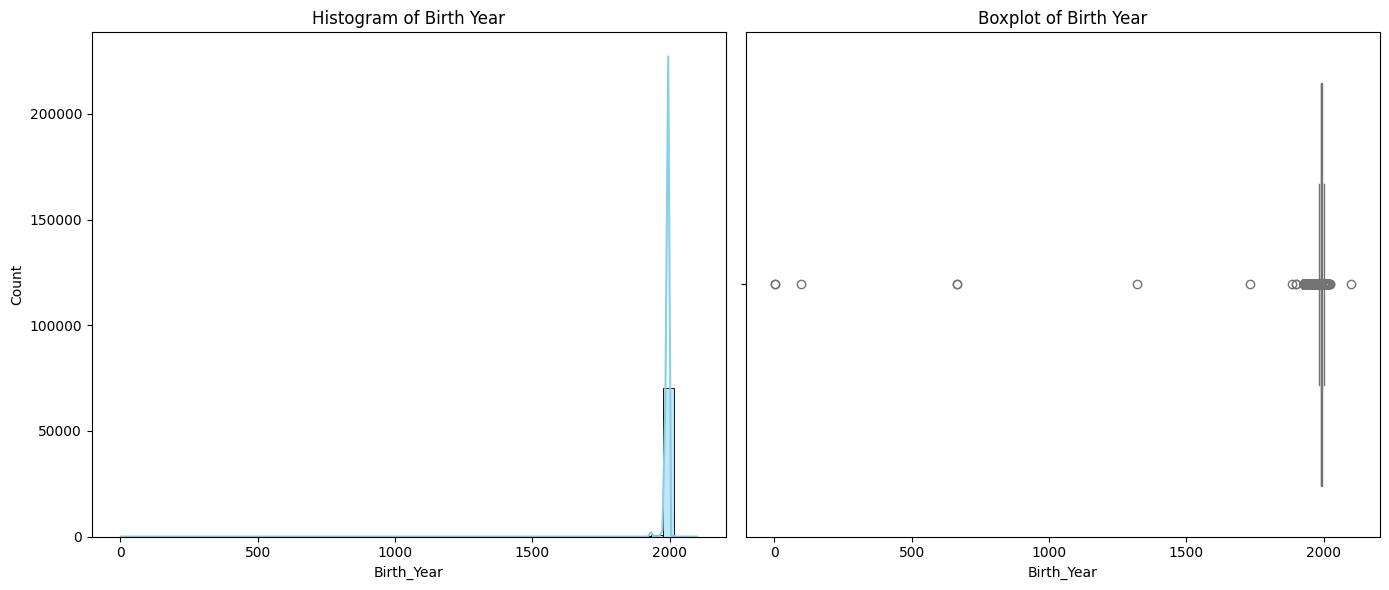

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(final_df["Birth_Year"], bins=50, kde=True, color='skyblue')
plt.title("Histogram of Birth Year")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=final_df["Birth_Year"], color='lightgreen')
plt.title("Boxplot of Birth Year")

plt.tight_layout()
plt.show()


In [115]:
Q1 = final_df["Birth_Year"].quantile(0.25)
Q3 = final_df["Birth_Year"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_df[(final_df["Birth_Year"] < lower_bound) | (final_df["Birth_Year"] > upper_bound)]
print("Number of outliers:", len(outliers))


Number of outliers: 2779


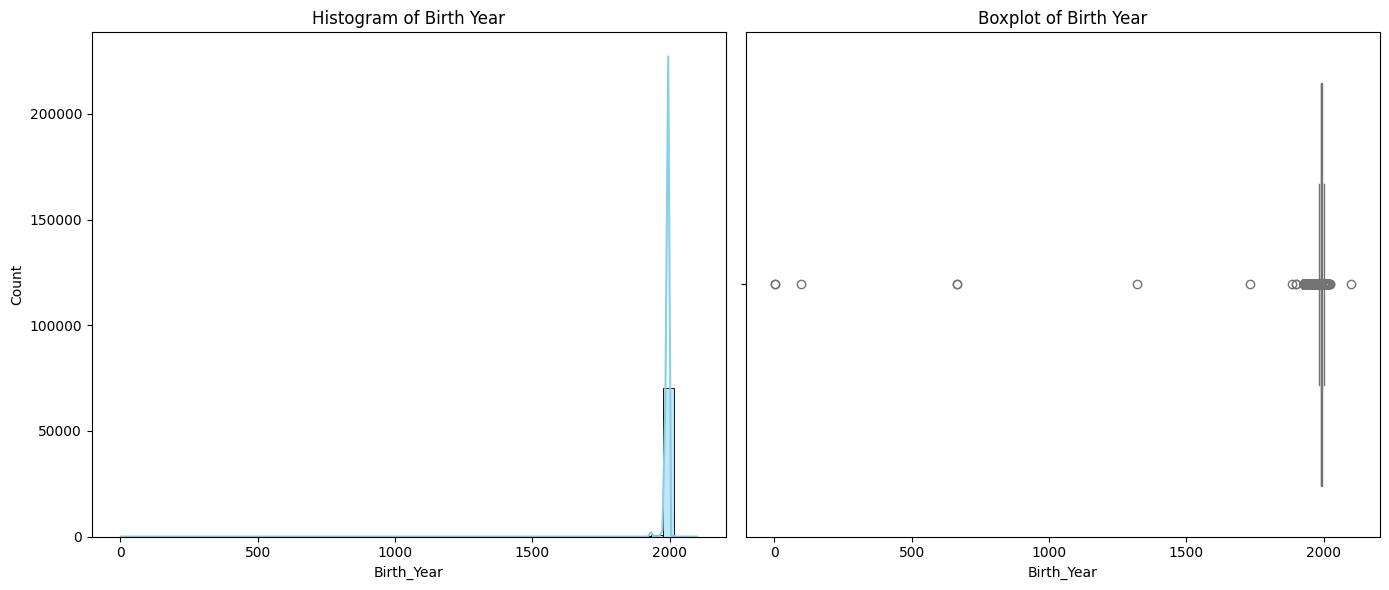

Birth_Year
1       2
97      1
666     2
1321    1
1730    1
       ..
2020    2
2021    1
2023    1
2024    1
2100    1
Name: count, Length: 81, dtype: int64

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data simulation based on describe output
# Generating synthetic data that roughly matches the summary statistics
import numpy as np
np.random.seed(0)
birth_years = np.random.normal(loc=1988.37, scale=14.77, size=23900).astype(int)

# Adding outlier values like 1 and 2023 manually to match describe
birth_years = np.append(birth_years, [1]*15 + [2023]*15)

# Create DataFrame
# Plotting
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(final_df["Birth_Year"], bins=50, kde=True, color='skyblue')
plt.title("Histogram of Birth Year")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=final_df["Birth_Year"], color='lightgreen')
plt.title("Boxplot of Birth Year")

plt.tight_layout()
plt.show()

# Outlier detection using IQR
Q1 = final_df["Birth_Year"].quantile(0.25)
Q3 = final_df["Birth_Year"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_df[(final_df["Birth_Year"] < lower_bound) | (final_df["Birth_Year"] > upper_bound)]
outlier_values = outliers["Birth_Year"].value_counts().sort_index()

outlier_values



In [117]:
# Define valid range
valid_min = 1945
valid_max = 2023

# Compute median of Birth_Year
median_year = final_df["Birth_Year"].median()
print(median_year)
# Replace out-of-range values with median
final_df["Birth_Year"] = final_df["Birth_Year"].apply(
    lambda x: median_year if x < valid_min or x > valid_max else x
)

# Check updated distribution and ensure no outliers beyond the fixed range
updated_outlier_values = final_df[(final_df["Birth_Year"] < valid_min) | (final_df["Birth_Year"] > valid_max)]
final_df["Birth_Year"].describe(), updated_outlier_values["Birth_Year"].value_counts()

1991.0


(count    71285.000000
 mean      1990.829277
 std          4.558264
 min       1945.000000
 25%       1989.000000
 50%       1991.000000
 75%       1994.000000
 max       2023.000000
 Name: Birth_Year, dtype: float64,
 Series([], Name: count, dtype: int64))

In [118]:
final_df["Age"] = 2025 - final_df["Birth_Year"]


In [120]:
# 1. Apply viewer category based on age
def categorize_viewer(age):
    if age >= 50:
        return "Classic_Era_Fans"
    elif 35 <= age < 50:
        return "Retro_Anime_Lovers"
    elif 25 <= age < 35:
        return "Millennial_Favorites"
    elif 15 <= age < 25:
        return "Zoomer_Picks"
    else:
        return "Gen_Alpha_Viewers"

final_df["Viewer_Category"] = final_df["Age"].apply(categorize_viewer)

# 2. Drop any previous duplicate viewer category columns if present
final_df = final_df.drop(columns=[col for col in final_df.columns if col in ['Viewer_Category_x', 'Viewer_Category_y']], errors='ignore')

# 3. Ensure 'user_id' is in final_df for merging
if 'user_id' not in final_df.columns:
    final_df["user_id"] = user_final_df["user_id"].values

# 4. Merge only if Viewer_Category not already in user_final_df
if 'Viewer_Category' not in user_final_df.columns:
    final_df = pd.merge(user_final_df, final_df[["user_id", "Viewer_Category"]], on="user_id", how="left")
else:
    final_df = user_final_df.copy()

# 5. Add one-hot encoded categories, avoiding duplicates
viewer_dummies = pd.get_dummies(final_df["Viewer_Category"], prefix="Category")

# Remove any existing dummy columns to avoid duplication
final_df = final_df.drop(columns=[col for col in viewer_dummies.columns if col in final_df.columns], errors='ignore')

# Concatenate new dummies
final_df = pd.concat([final_df, viewer_dummies], axis=1)


In [121]:
final_df.columns


Index(['user_id', 'Username', 'Gender', 'Birth_Year', 'Mean Score',
       'Completed', 'avg_Action', 'avg_Adventure', 'avg_Avant Garde',
       'avg_Award Winning', 'avg_Boys Love', 'avg_Comedy', 'avg_Drama',
       'avg_Ecchi', 'avg_Erotica', 'avg_Fantasy', 'avg_Girls Love',
       'avg_Gourmet', 'avg_Hentai', 'avg_Horror', 'avg_Mystery', 'avg_Romance',
       'avg_Sci-Fi', 'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural',
       'avg_Suspense', 'Age', 'Viewer_Category', 'Category_Classic_Era_Fans',
       'Category_Gen_Alpha_Viewers', 'Category_Millennial_Favorites',
       'Category_Retro_Anime_Lovers', 'Category_Zoomer_Picks'],
      dtype='object')

In [122]:
final_df.sample(5)

,user_id,Username,Gender,Birth_Year,Mean Score,Completed,avg_Action,avg_Adventure,avg_Avant Garde,avg_Award Winning,...,avg_Sports,avg_Supernatural,avg_Suspense,Age,Viewer_Category,Category_Classic_Era_Fans,Category_Gen_Alpha_Viewers,Category_Millennial_Favorites,Category_Retro_Anime_Lovers,Category_Zoomer_Picks
63239,1078611,cruorfrater,Male,1990.0,9.08,12.0,9.00,9.00,10.00,9.33,...,7.77,8.13,10.00,35.0,Retro_Anime_Lovers,False,False,False,True,False
4916,23428,Aya45,Female,1988.0,8.76,161.0,8.84,8.49,7.91,9.14,...,8.25,8.77,9.20,37.0,Retro_Anime_Lovers,False,False,False,True,False
51719,490446,Valasar,Male,1990.0,7.77,61.0,8.00,8.27,7.91,8.20,...,7.00,7.60,8.50,35.0,Retro_Anime_Lovers,False,False,False,True,False
66793,1155305,MikkyRiv,Female,1995.0,9.93,121.0,9.88,10.00,7.91,8.52,...,10.00,9.75,8.41,30.0,Millennial_Favorites,False,False,True,False,False
44948,435751,DemonQuincy,Male,1996.0,8.24,67.0,8.21,8.38,6.00,8.27,...,7.77,8.33,8.41,29.0,Millennial_Favorites,False,False,True,False,False


In [123]:
final_df.info()
final_df.to_csv("Final_User_Dataset.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71285 entries, 0 to 71284
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        71285 non-null  int64  
 1   Username                       71285 non-null  object 
 2   Gender                         71285 non-null  object 
 3   Birth_Year                     71285 non-null  float64
 4   Mean Score                     71285 non-null  float64
 5   Completed                      71285 non-null  float64
 6   avg_Action                     71285 non-null  float64
 7   avg_Adventure                  71285 non-null  float64
 8   avg_Avant Garde                71285 non-null  float64
 9   avg_Award Winning              71285 non-null  float64
 10  avg_Boys Love                  71285 non-null  float64
 11  avg_Comedy                     71285 non-null  float64
 12  avg_Drama                      71285 non-null 

In [ ]:
The code `viewer_dummies = viewer_dummies.astype(int)` converts the boolean values in the `viewer_dummies` DataFrame into integers. 

For example:
- `True` becomes `1`
- `False` becomes `0`

This is useful when you want to represent categorical data in a numerical format, such as for machine learning models or further numerical analysis.

In [124]:
final_df.columns

Index(['user_id', 'Username', 'Gender', 'Birth_Year', 'Mean Score',
       'Completed', 'avg_Action', 'avg_Adventure', 'avg_Avant Garde',
       'avg_Award Winning', 'avg_Boys Love', 'avg_Comedy', 'avg_Drama',
       'avg_Ecchi', 'avg_Erotica', 'avg_Fantasy', 'avg_Girls Love',
       'avg_Gourmet', 'avg_Hentai', 'avg_Horror', 'avg_Mystery', 'avg_Romance',
       'avg_Sci-Fi', 'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural',
       'avg_Suspense', 'Age', 'Viewer_Category', 'Category_Classic_Era_Fans',
       'Category_Gen_Alpha_Viewers', 'Category_Millennial_Favorites',
       'Category_Retro_Anime_Lovers', 'Category_Zoomer_Picks'],
      dtype='object')

In [ ]:
def convert_bool_to_int(df, columns):
    """
    Converts boolean values in the specified columns of a DataFrame to integers.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to convert.

    Returns:
    pd.DataFrame: The updated DataFrame with specified columns converted.
    """
    df[columns] = df[columns].astype(int)
    return df

In [126]:
final_df[['Category_Classic_Era_Fans',
          'Category_Gen_Alpha_Viewers', 'Category_Millennial_Favorites',
          'Category_Retro_Anime_Lovers', 'Category_Zoomer_Picks']] = final_df[['Category_Classic_Era_Fans',
                                                                               'Category_Gen_Alpha_Viewers', 'Category_Millennial_Favorites',
                                                                               'Category_Retro_Anime_Lovers', 'Category_Zoomer_Picks']].astype(int)

In [127]:
final_df.shape

(71285, 34)

In [128]:
final_df.columns

Index(['user_id', 'Username', 'Gender', 'Birth_Year', 'Mean Score',
       'Completed', 'avg_Action', 'avg_Adventure', 'avg_Avant Garde',
       'avg_Award Winning', 'avg_Boys Love', 'avg_Comedy', 'avg_Drama',
       'avg_Ecchi', 'avg_Erotica', 'avg_Fantasy', 'avg_Girls Love',
       'avg_Gourmet', 'avg_Hentai', 'avg_Horror', 'avg_Mystery', 'avg_Romance',
       'avg_Sci-Fi', 'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural',
       'avg_Suspense', 'Age', 'Viewer_Category', 'Category_Classic_Era_Fans',
       'Category_Gen_Alpha_Viewers', 'Category_Millennial_Favorites',
       'Category_Retro_Anime_Lovers', 'Category_Zoomer_Picks'],
      dtype='object')

In [129]:
final_df.head()

,user_id,Username,Gender,Birth_Year,Mean Score,Completed,avg_Action,avg_Adventure,avg_Avant Garde,avg_Award Winning,...,avg_Sports,avg_Supernatural,avg_Suspense,Age,Viewer_Category,Category_Classic_Era_Fans,Category_Gen_Alpha_Viewers,Category_Millennial_Favorites,Category_Retro_Anime_Lovers,Category_Zoomer_Picks
0,1,Xinil,Male,1985.0,7.37,233.0,7.68,7.90,8.00,8.18,...,7.56,7.66,8.18,40.0,Retro_Anime_Lovers,0,0,0,1,0
1,20,vondur,Male,1988.0,8.06,94.0,8.02,8.24,9.00,8.43,...,8.38,8.43,8.56,37.0,Retro_Anime_Lovers,0,0,0,1,0
2,66,Hiromi,Male,1990.0,7.53,148.0,7.49,7.31,7.00,7.90,...,8.00,7.85,7.00,35.0,Retro_Anime_Lovers,0,0,0,1,0
3,82,Achtor,Male,1989.0,7.17,153.0,7.36,7.71,8.80,8.25,...,6.75,7.40,8.18,36.0,Retro_Anime_Lovers,0,0,0,1,0
4,112,luffykun,Male,1983.0,8.77,125.0,8.60,8.36,7.91,9.80,...,9.50,8.60,10.00,42.0,Retro_Anime_Lovers,0,0,0,1,0


In [130]:
final_df.to_csv("Final_User_Dataset.csv",index=False)